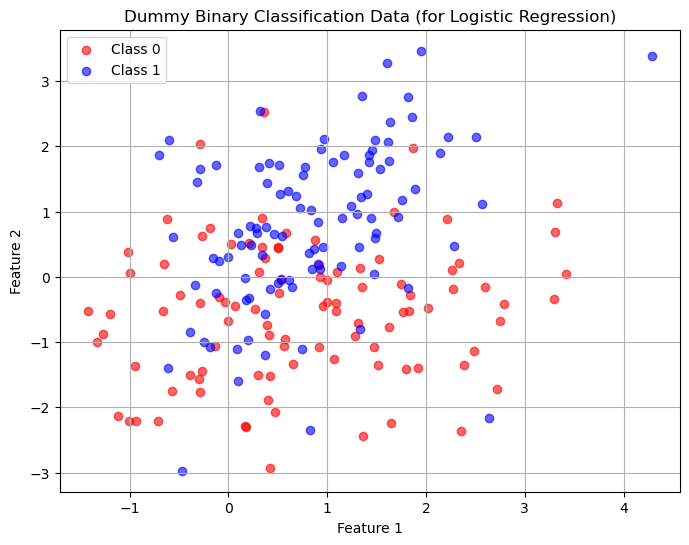

Features shape: (200, 2)
Target shape: (200,)


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Set seed
np.random.seed(42)


# Generate a classification dataset
X, y = make_classification(
    n_samples=200,
    n_features=2,         
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=0.8,         
    flip_y=0.1,            
    random_state=42
)


plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color="red", label="Class 0", alpha=0.6)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color="blue", label="Class 1", alpha=0.6)
plt.title("Dummy Binary Classification Data (for Logistic Regression)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


print("Features shape:", X.shape)

print("Target shape:",y.shape)

Final loss: 0.00826646213229075
Training accuracy: 100.00%


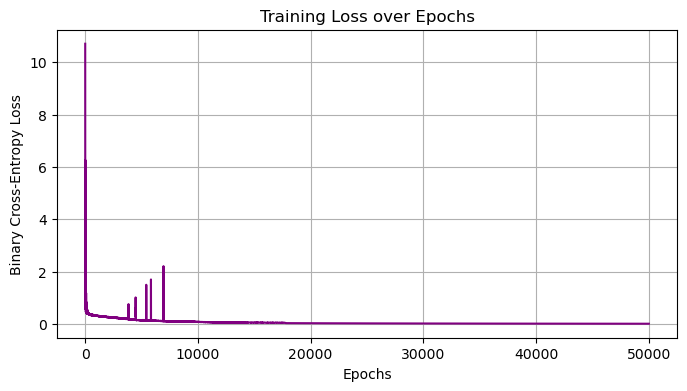

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Activation functions
def ReLU(x):
    return np.maximum(0, x)

def ReLU_derivative(x):
    return np.where(x > 0, 1, 0)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(a):
    return a * (1 - a)
    

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std
y_train = y_train.reshape(-1, 1)

# Weight initialization
def init_weights(input_size, hidden1_size, hidden2_size, output_size):
    np.random.seed(42)
    W1 = np.random.randn(input_size, hidden1_size) 
    b1 = np.zeros((1, hidden1_size))
    W2 = np.random.randn(hidden1_size, hidden2_size) 
    b2 = np.zeros((1, hidden2_size))
    W3 = np.random.randn(hidden2_size, output_size) 
    b3 = np.zeros((1, output_size))
    return W1, b1, W2, b2, W3, b3

# Forward pass
def forward(X, W1, b1, W2, b2, W3, b3):
    Z1 = X @ W1 + b1
    A1 = ReLU(Z1)
    Z2 = A1 @ W2 + b2
    A2 = ReLU(Z2)
    Z3 = A2 @ W3 + b3
    A3 = sigmoid(Z3)
    return Z1, A1, Z2, A2, Z3, A3

# Backward pass
def backward(X, y, Z1, A1, Z2, A2, A3, W2, W3):
    m = X.shape[0]
    dZ3 = A3 - y
    dW3 = A2.T @ dZ3 / m
    db3 = np.sum(dZ3, axis=0, keepdims=True) / m

    dA2 = dZ3 @ W3.T
    dZ2 = dA2 * ReLU_derivative(Z2)
    dW2 = A1.T @ dZ2 / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m

    dA1 = dZ2 @ W2.T
    dZ1 = dA1 * ReLU_derivative(Z1)
    dW1 = X.T @ dZ1 / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    return dW1, db1, dW2, db2, dW3, db3

# Update weights
def update(W1, b1, dW1, db1, W2, b2, dW2, db2, W3, b3, dW3, db3, lr):
    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2
    W3 -= lr * dW3
    b3 -= lr * db3
    return W1, b1, W2, b2, W3, b3

# Training
def train(X, y, input_size, hidden1_size, hidden2_size, output_size, epochs, lr):
    W1, b1, W2, b2, W3, b3 = init_weights(input_size, hidden1_size, hidden2_size, output_size)
    loss_history = []

    for i in range(epochs):
        Z1, A1, Z2, A2, Z3, A3 = forward(X, W1, b1, W2, b2, W3, b3)
        loss = -np.mean(y * np.log(A3 + 1e-8) + (1 - y) * np.log(1 - A3 + 1e-8))
        loss_history.append(loss)

        dW1, db1, dW2, db2, dW3, db3 = backward(X, y, Z1, A1, Z2, A2, A3, W2, W3)
        W1, b1, W2, b2, W3, b3 = update(W1, b1, dW1, db1, W2, b2, dW2, db2, W3, b3, dW3, db3, lr)

    return W1, b1, W2, b2, W3, b3, loss_history

# Accuracy
def accuracy(X, y, W1, b1, W2, b2, W3, b3):
    _, _, _, _, _, A3 = forward(X, W1, b1, W2, b2, W3, b3)
    preds = (A3 > 0.5).astype(int)
    return np.mean(preds == y) * 100

# Architecture
input_size = X_train.shape[1]
hidden1_size = 50
hidden2_size = 50
output_size = 1

# Train
W1, b1, W2, b2, W3, b3, loss_history = train(
    X_train, y_train,
    input_size=input_size,
    hidden1_size=hidden1_size,
    hidden2_size=hidden2_size,
    output_size=output_size,
    epochs=50000,
    lr=0.1
)

# Report
print("Final loss:", loss_history[-1])
print("Training accuracy: {:.2f}%".format(accuracy(X_train, y_train, W1, b1, W2, b2, W3, b3)))

# Plot loss
plt.figure(figsize=(8, 4))
plt.plot(loss_history, color='purple')
plt.title("Training Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Binary Cross-Entropy Loss")
plt.grid(True)
plt.show()


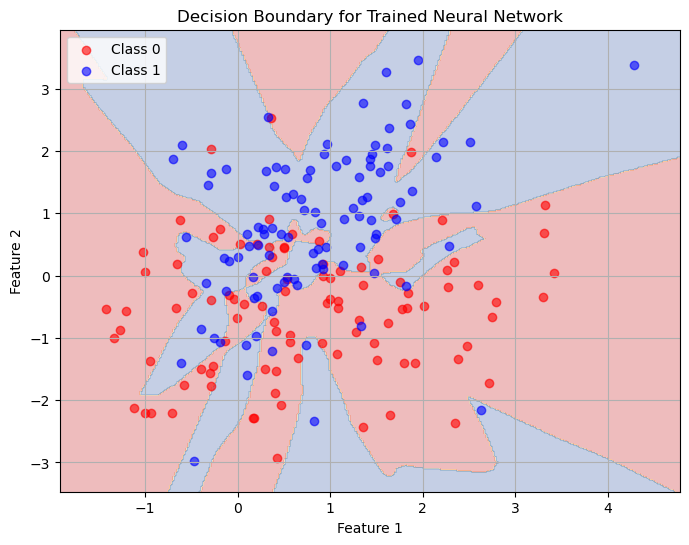

In [7]:
# First, reshape y_test in case you want to plot test data later
y = y.reshape(-1, 1)

# Create meshgrid
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Prepare grid points and normalize
grid = np.c_[xx.ravel(), yy.ravel()]
grid_normalized = (grid - mean) / std

# Forward pass on grid points
_, _, _, _, _, A3 = forward(grid_normalized, W1, b1, W2, b2, W3, b3)
Z = (A3 > 0.5).astype(int).reshape(xx.shape)

# Plotting
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.3)

# Plot training points
plt.scatter(X[y[:, 0] == 0][:, 0], X[y[:, 0] == 0][:, 1], 
            color="red", label="Class 0", alpha=0.6)
plt.scatter(X[y[:, 0] == 1][:, 0], X[y[:, 0] == 1][:, 1], 
            color="blue", label="Class 1", alpha=0.6)

plt.title("Decision Boundary for Trained Neural Network")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()
